<a href="https://colab.research.google.com/github/iamdev3/Google-Playstore-Apps-Analysis-/blob/main/Analysis_of_Google_Playstore_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project : Google Play Store App Review Analysis**

Project Type - EDA


#**Project Summary :**

###The play store review data has enormous potential to drive an app making businesses to success. Data with each columns category, rating, size, installs and many more has values in app (row). Exploring & analyzing the data to discover key factors responsible for app engagement and success. Data actionable insights drawn for android market and for developers to work on.

###The objective of this experiment is to deliver insights to understand customer demands better and thus help developers to popularize the product. We have tried to discover the relationships among various attributes such as which application is free or paid, what are the user reviews, rating of the application etc.

# **Github Link :**

 Analysis_of_Google_Playstore_Dataset.ipynb

# **Problem Statement :**

###Android is expanding as an operating system. It has captured around 74% of the total market which is a true indicator of the huge amount of population using android. Our goal is to help Tech Companies & Android Developers to know what is the motivating factor for people to download an app. It will also help to find out the factors that affect someone’s decision to download an app. I would like to analyse category, reviews, price, ratings and installs for this purpose and find out how they are inter related.

#**Data Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Input Files:
### **Play Store Data.csv** - It contains the basic details of the app like number of user reviews, ratings, etc.
### **User Reviews.csv** - It contains the user reviews and its sentiment score for the respective app.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data analysis notes/Capston project 1 /Play Store Data.csv')

In [ ]:
df.head()                                                                       # check first 5 raws for overview

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#df.tail()                                                #<--- to analize last 5 raw of dataframe

## **Analyze General Dataset Information**


In [ ]:
df.shape

(10841, 13)

There are total 13 columns in the Dataset and 10841 records are present in it

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

# by The describe() method we get statistical description of collumns containing numeric data in the DataFrame.

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **DATA CLEANING**  


Analyze all the collumn and get the total sum of nul values in each

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Creting box plot and checking the Outliers in the dataset

<Axes: >

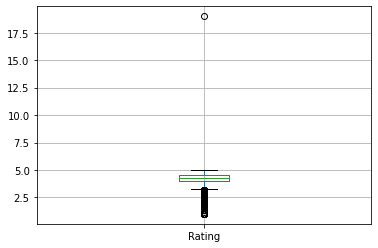

In [ ]:
df.boxplot()
#or df.plot(kind='box')

# boxplot will only work for  numeric value column, Which is column -'Rating' here. we can see that there is an outlier value which has rating above 17.5

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

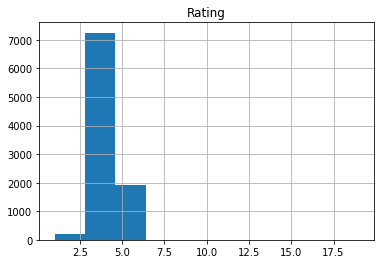

In [ ]:
df.hist()
# or plt.hist(df['Rating'].values)

# histogram plot is also only work for column which have numeric value,


--> There was some outliers in the Rating column, Generally rating was calculate on a scale from 1 to 5 so we will remove those values where rating is greater than

###Checking the Rating column where values is grater than 5

In [ ]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


--> So we have found only one row where Rating is greater than 5 so it could be treated as outlier, We will remove that row

In [ ]:
df.drop([10472],inplace=True)

In [ ]:
df[10470 : 10475]

#or df.iloc[10470 : 10475]
# we can see that we had succesfully droped index raw 10472

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


--> Plotting histogram and box plot to check the distribution after removing outliers Now, the distribution of rating is showing between 1 to 5

<Axes: >

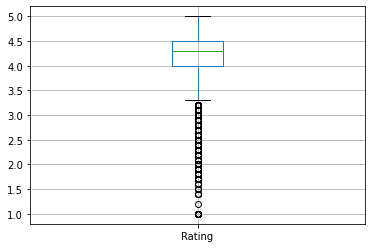

In [ ]:
df.boxplot()

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

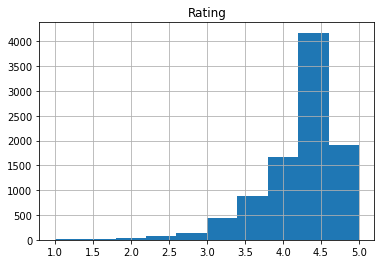

In [ ]:
df.hist()

Now, the distribution of rating is showing between 1 to 5 as per histogram graph and boxplot.

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Rating column has most number of null values in the dataset, Rating is given between 1 to 5 numbers, so for replacing them we have taken the median of the Rating column


In [ ]:
df.Rating.median()                                                               #<--- # by which finding the median of the Rating column

4.3

In [ ]:
df.fillna( {'Rating' : df.Rating.median()}, inplace=True)
#or df['Rating'].fillna(df['Rating'].median(),inplace = True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

<Axes: >

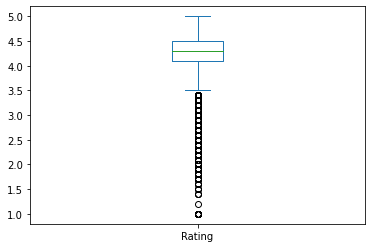

In [ ]:
df['Rating'].plot(kind='box')

---> Basically Type Column have Object datatype & only two logical value either it can be Free or Paid,
to find the null value in Type column

In [ ]:
df['Type'].value_counts()

#Also by this code we can see it only has 2 value Free & Paid

Free    10039
Paid      800
Name: Type, dtype: int64

In [ ]:
df[~((df.Type == 'Free') | (df.Type =='Paid'))]

#by this we can get the exact raw of dataframe having not free nor paid data in type

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
df.Type.mode()

0    Free
Name: Type, dtype: object

###We will fill that Null Value with Mode, as it contain character so we can choose it by mode value of Column

In [ ]:
df.fillna ({'Type': df.Type.mode()[0]}, inplace= True)

#df.loc[9148]        <------- to see that perticular raw

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

###Same way we fill the null values in 'Current Ver' & 'Android Ver' column. so we will also replace them with same procedure

In [ ]:
df.fillna({'Current Ver': df['Current Ver'].mode()[0]}, inplace= True)

In [ ]:
df.fillna({'Android Ver': df['Android Ver'].mode()[0]}, inplace= True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now we have no collumn left with Null Values.
Further to plot relations & perform math, we need some columns data type to be numeric

## **We have Column 'Price', 'Installs', 'Review' which contains Numbers, Convert it's object datatype to Numeric Datatype**


In [ ]:
df.Price.unique()

# here we can see that is has $3.99 $1.49 ...values, pythod panda will consider it as string datatype object.
# to perform math on this data we need to convert its data type, First remove the $ sign

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

## Convert 'Price' column datatype from string to float type


In [ ]:
df.Price = df.Price.apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))

 #----> this will remove $ sign only it won't convert its datatype

In [ ]:
df['Price']= df['Price'].astype('float')                                         #-----> will convert datatype string to float
# or df["Price"]=pd.to_numeric(df["Price"])

df.Price.info()

<class 'pandas.core.series.Series'>
Int64Index: 10840 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
10840 non-null  float64
dtypes: float64(1)
memory usage: 169.4 KB


## Convert 'Reviews' columns any object data type to numeric datatype

In [ ]:
#df.Reviews.unique()                               #------> to just overview unique values and datatype which is object here

df['Reviews']= df['Reviews'].astype('int')
# or df["Reviews"]=pd.to_numeric(df["Reviews"])

df.Reviews.info()

<class 'pandas.core.series.Series'>
Int64Index: 10840 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10840 non-null  int64
dtypes: int64(1)
memory usage: 169.4 KB



## Convert 'Installs' columns any object data type to numeric datatype



In [ ]:
#df.Installs.unique()                                   #------> to just overview unique values & we found that it contains + & , sign so first remove it & datatype which is any object datatype here

df.Installs =df.Installs.apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df.Installs =df.Installs.apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

In [ ]:
df["Installs"]=df["Installs"].astype('int')                                                     #-----> now its succesfully converted into int/numeric data type
# or df["Installs"]=pd.to_numeric(df["Installs"])

## Converting the datatype of Last_update from String to DateTime object

In [ ]:
df['Last_updated'] = pd.to_datetime(df['Last Updated'])                          #-----> by which its succesfully converted into datetime data type

#df.Last_updated.info   <-- to check updated datatype

we had successfully converted the data types of reqired column now we can analyze & perform some math operatons & relations better

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  object        
 11  Current Ver     10840 non-null  object        
 12  Android Ver     10840 non-null  object        
 13  Last_updated    10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)


In [ ]:
df.describe()                                                     # comparing previously now we have total 4 columns statistical data

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


#**Data Manipulation & Data Wranglling**


##**Categorical Analysis**


##  Number of Apps in each category wise

In [ ]:
# Category vs No of Apps

category_group =df.groupby('Category').agg({'App':'count'}).sort_values(['App'],ascending=False)
category_group

,App
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


Text(0.5, 0, 'Category')

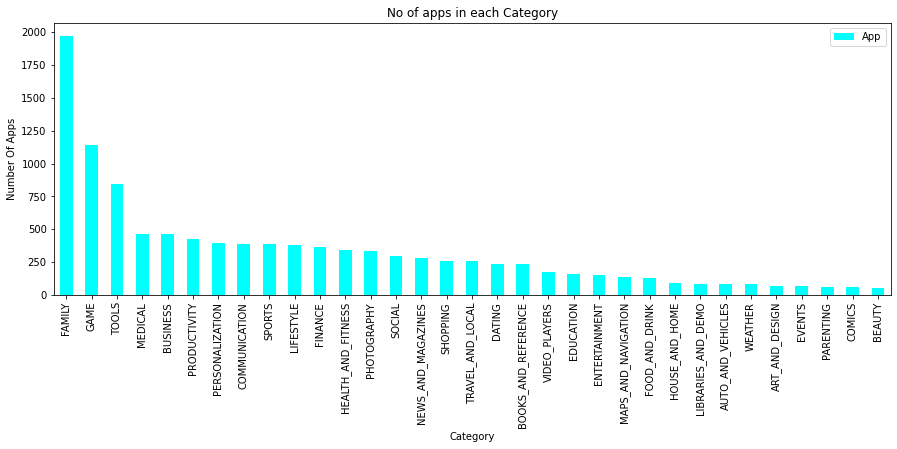

In [ ]:
# Creating bar graph from the above data

category_group.plot.bar(figsize=(15,5),color='cyan')

plt.title('No of apps in each Category')
plt.ylabel('Number Of Apps')
plt.xlabel('Category')

###Top 5 category with highest No of Apps

In [ ]:
category_group.head(5)

,App
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460


###-->  Family, Game, Tools, Medical & Business are the top 5 categories which contains the most number of Apps.

###-->  Family is the category among all which contain the most number of Apps.

##What is the average user rating Category wise?

In [ ]:
avg_rate = df.groupby('Category').agg({'Rating':'mean'}).sort_values(['Rating'],ascending=False)
avg_rate

,Rating
Category,
EVENTS,4.395313
EDUCATION,4.388462
ART_AND_DESIGN,4.355385
BOOKS_AND_REFERENCE,4.335498
PERSONALIZATION,4.328827
PARENTING,4.300000
GAME,4.286888
BEAUTY,4.283019
HEALTH_AND_FITNESS,4.280059


##Top 5 category with highest avg user rating

In [ ]:
# we had already sorted avg_rate values in decending order so
Top_5_mean_rating = avg_rate.head(5)

#Top_5_mean_rating = df.groupby('Category').agg({'Rating':'mean'}).sort_values(['Rating'],ascending=False).head()
Top_5_mean_rating

,Rating
Category,
EVENTS,4.395313
EDUCATION,4.388462
ART_AND_DESIGN,4.355385
BOOKS_AND_REFERENCE,4.335498
PERSONALIZATION,4.328827


###--> Events, Education, Art_and_Design, Books_and_reference and Personalization are the top 5 categories which has the highest average user Rating.

Text(0.5, 0, 'Rating')

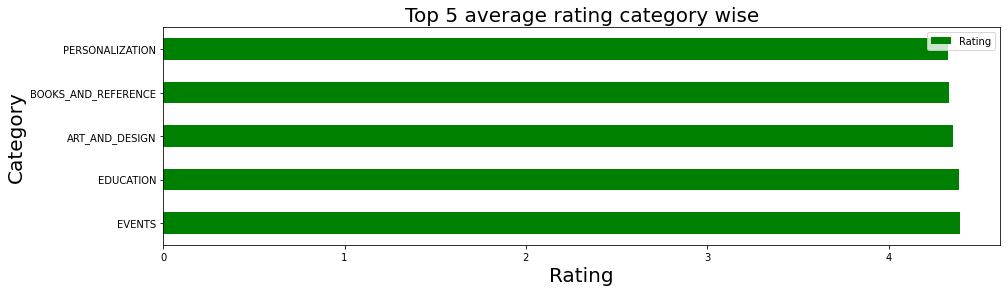

In [ ]:
#ploting Bar Chart for better visualization

Top_5_mean_rating.plot.barh(figsize=(15,4), color='Green')

plt.title('Top 5 average rating category wise',fontsize = 20)
plt.ylabel('Category', fontsize = 20)
plt.xlabel('Rating',fontsize = 20)

## Total number of App installation Category wise by user ?

In [ ]:
Installation = df.groupby('Category').agg({'Installs':'sum'}).sort_values('Installs', ascending=False)
Installation

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


<Axes: xlabel='Category'>

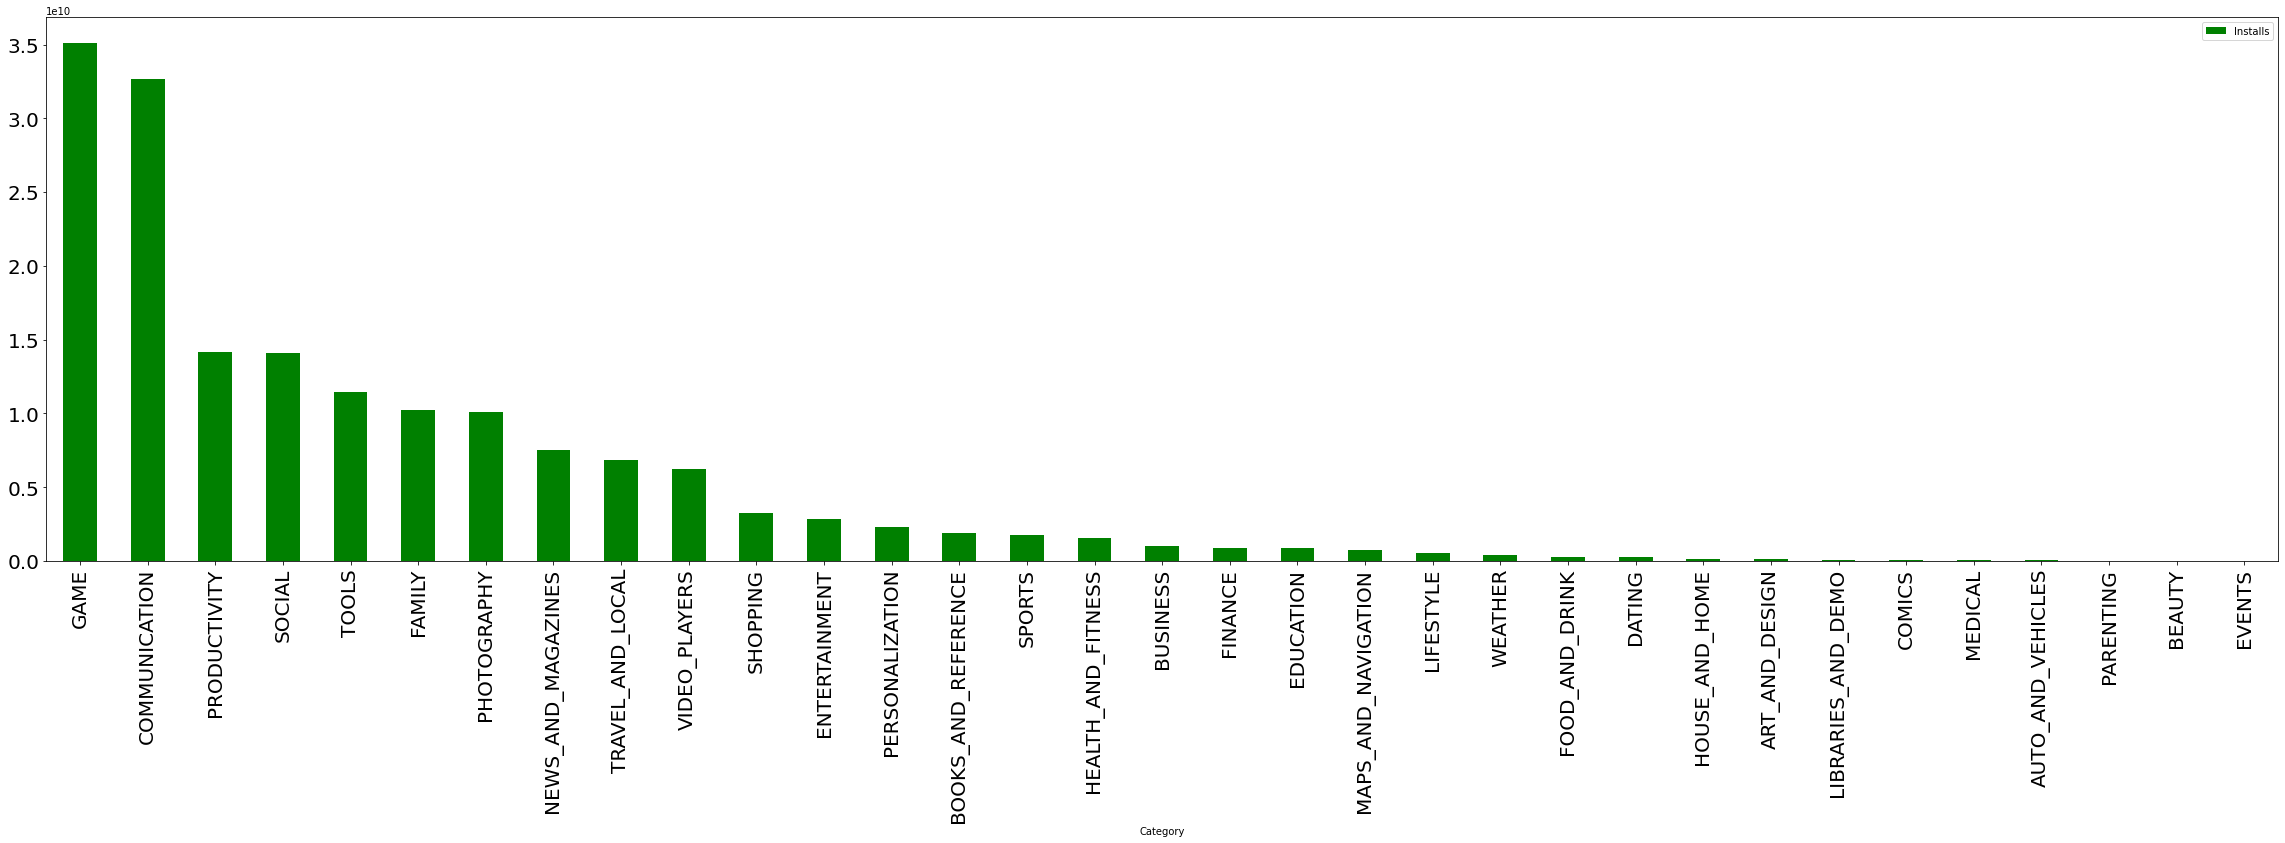

In [ ]:
Installation.plot.bar(figsize=(40,10),fontsize=20,color='green')

In [ ]:
# Now Get Top 5 category with most no of installation

Top_5_Users_Category_Wise = Installation.head()
#or Top_5_Users_Category_Wise = df.groupby(['Category']).agg({'Installs':'sum'}).sort_values(['Installs'],ascending=False).head(5)

Top_5_Users_Category_Wise

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915


--> As per analysis Top 5 categories which has the highest number of app installation are **Game, Communication, Productivity, Social & Tools**.

--> **Game is top most category among all which has the highest number of user installation.**

##Which Category has the higest Average app Installation?

In [ ]:
highest_avg_install = df.groupby('Category').agg({'Installs':'mean'}).sort_values('Installs',ascending=False).head()
highest_avg_install

,Installs
Category,
COMMUNICATION,8.435989e+07
SOCIAL,4.769447e+07
VIDEO_PLAYERS,3.555430e+07
PRODUCTIVITY,3.343418e+07
GAME,3.066960e+07


###Category with the highest average app installs: Communication

## **App Rating Analysis**

Creating a function **user_rating**

* If rating is between 5 and 4 then it is Top Rated,
* If rating is between 3 and 4 then it is Above Average,
* If raiting is between 2 and 3 then it is Average
* And Finaly If rating between 1 and 2 it is rated as Below Average.

In [ ]:
def user_rating (Rating):
  if Rating<=5 and Rating>=4:
    x= 'Top Rated'
  elif Rating<4 and Rating>=3:
    x = 'Above Average'
  elif Rating<3 and Rating>=2:
    x = 'Average'
  elif Rating<2 and Rating>=1:
    x = 'Below Average'
  return x


In [ ]:
user_rating(5)               # Checking purrpose

'Top Rated'

###Creating a new column Rating Type and apply that function we have created above.

In [ ]:
df['Rating_Type'] = df.apply(lambda x : user_rating(x['Rating']),axis=1)

###suppose we want to analyse the percentage of all unique values of Rating type category

In [ ]:
Rating_type = df['Rating_Type'].value_counts()
Rating_type

Top Rated        8842
Above Average    1711
Average           231
Below Average      56
Name: Rating_Type, dtype: int64

Text(0.5, 0, 'Apps')

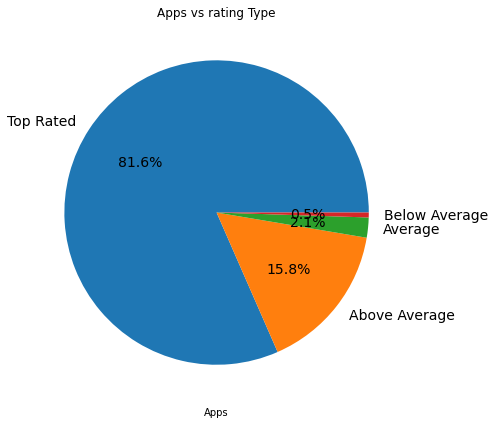

In [ ]:
#Plot Pie-Chart for Better Visulization

Rating_type.plot.pie(figsize=(14,7), fontsize=14, autopct='%1.1f%%')

plt.title('Apps vs rating Type')
plt.ylabel('')
plt.xlabel('Apps')

Text(0.5, 0, 'Apps')

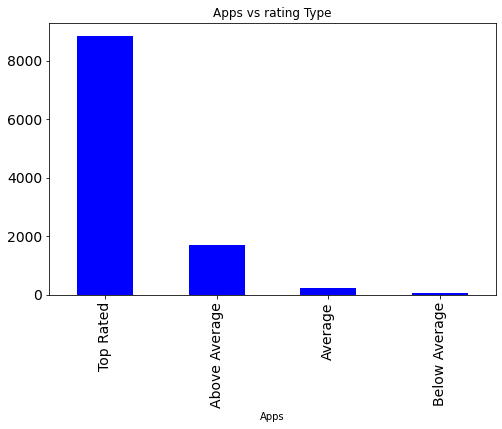

In [ ]:
Rating_type.plot.bar(figsize=(8,5), fontsize=14, color = 'blue')

plt.title('Apps vs rating Type')
plt.ylabel('')
plt.xlabel('Apps')

-> 81.6% Apps in the dataset are Top Rated.

--> 15.8% Apps in the dataset are Above Average.

--> 2.1% Apps in the dataset are Average.

--> 0.5% Apps in the dataset are Below Average.

##**Free vs Paid Apps**

In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_updated,Rating_Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,Top Rated


In [ ]:
#no of Free vs Paid apps

free_vs_Paid_app = df['Type'].value_counts()
free_vs_Paid_app

Free    10040
Paid      800
Name: Type, dtype: int64

Text(0.5, 0, 'Apps')

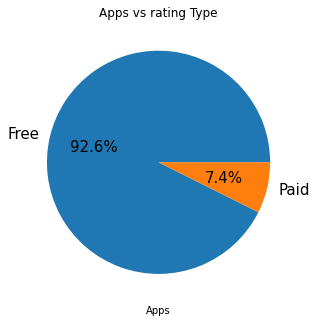

In [ ]:
free_vs_Paid_app.plot.pie(figsize=(5,10),fontsize=15,autopct="%1.1f%%")

plt.title('Apps vs rating Type')
plt.ylabel('')
plt.xlabel('Apps')

--> 92.6% Apps are Free which means Users don't need to pay any amount for using them.

--> 7.4% Apps are Paid which means Users have to pay the Price for using them.

--> Most Of the Apps Available on Google Playstore Are Free Apps

## What is the Total number Free and Paid Apps Installation wise?

In [ ]:
Typewise_app_Installation = df.groupby('Type').agg({'Installs':'sum'})
Typewise_app_Installation

,Installs
Type,
Free,167560477406
Paid,72956081


##--> Free Apps has more user Installation than the paid apps.It means Free apps are more Preferable than the Paid apps.

###What is the number of Free and Paid Apps Category wise?

In [ ]:
Total_Installation_bycategory = df.groupby(['Category','Type']).agg({'Installs':'count'}).sort_values(['Installs'],ascending=False).unstack()
Total_Installation_bycategory

Installs       
Type                    Free   Paid
Category                           
ART_AND_DESIGN          62.0    3.0
AUTO_AND_VEHICLES       82.0    3.0
BEAUTY                  53.0    NaN
BOOKS_AND_REFERENCE    203.0   28.0
BUSINESS               446.0   14.0
COMICS                  60.0    NaN
COMMUNICATION          360.0   27.0
DATING                 227.0    7.0
EDUCATION              152.0    4.0
ENTERTAINMENT          147.0    2.0
EVENTS                  63.0    1.0
FAMILY                1781.0  191.0
FINANCE                349.0   17.0
FOOD_AND_DRINK         125.0    2.0
GAME                  1061.0   83.0
HEALTH_AND_FITNESS     325.0   16.0
HOUSE_AND_HOME          88.0    NaN
LIBRARIES_AND_DEMO      84.0    1.0
LIFESTYLE              363.0   19.0
MAPS_AND_NAVIGATION    132.0    5.0
MEDICAL                354.0  109.0
NEWS_AND_MAGAZINES     281.0    2.0
PARENTING               58.0    2.0
PERSONALIZATION        309.0   83.0
PHOTOGRAPHY            313.0   22.0
PRODUCTIVITY           396.0   28.0
SHOPPING               258.0    2.0
SOCIAL                 292.0    3.0
SPORTS                 360.0   24.0
TOOLS                  765.0   78.0
TRAVEL_AND_LOCAL       246.0   12.0
VIDEO_PLAYERS          171.0    4.0
WEATHER                 74.0    8.0

Text(0.5, 0, 'Category')

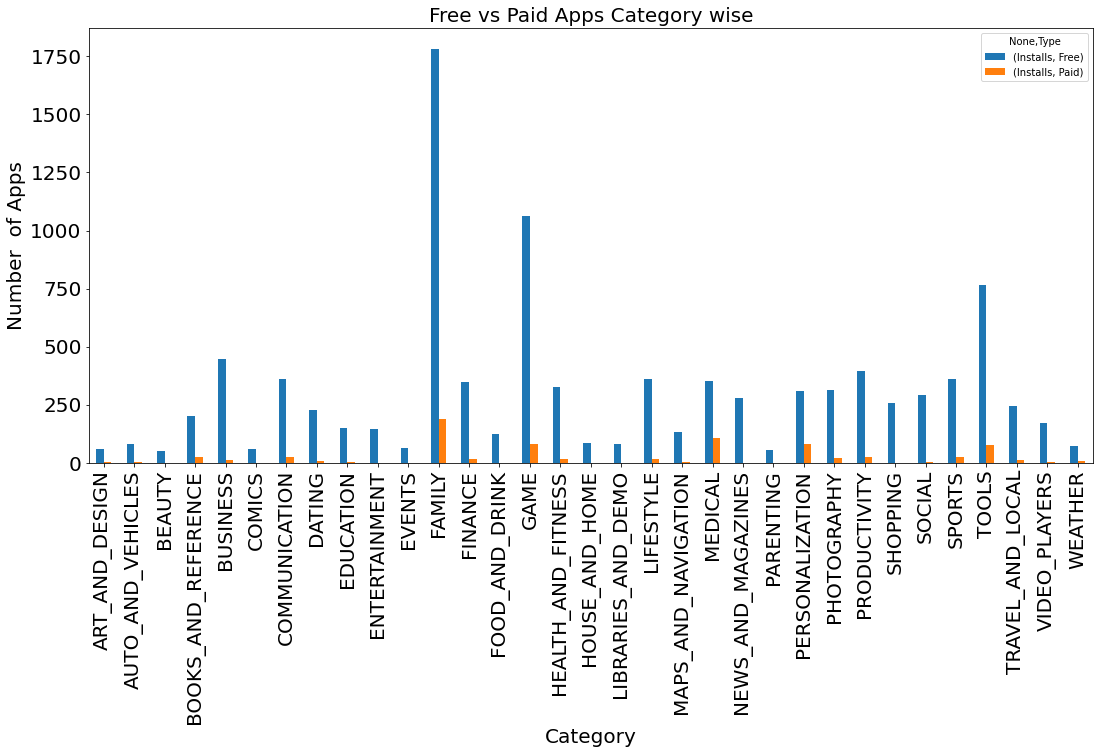

In [ ]:
Total_Installation_bycategory.plot.bar(figsize=(18,8),fontsize=20)

plt.title('Free vs Paid Apps Category wise',fontsize = 20)
plt.ylabel('Number  of Apps',fontsize = 20)
plt.xlabel('Category',fontsize = 20)

##What is the number of Free Apps which has 1 billion or more than of users.

In [ ]:
one_billionclub = df[(df['Type']=='Free') & (df['Installs']>=1000000000)][['App','Installs']].reset_index()
one_billionclub

# here some apps are getting repeated here

,index,App,Installs
0,152,Google Play Books,1000000000
1,335,Messenger – Text and Video Chat for Free,1000000000
2,336,WhatsApp Messenger,1000000000
3,338,Google Chrome: Fast & Secure,1000000000
4,340,Gmail,1000000000
5,341,Hangouts,1000000000
6,381,WhatsApp Messenger,1000000000
7,382,Messenger – Text and Video Chat for Free,1000000000
8,386,Hangouts,1000000000
9,391,Skype - free IM & video calls,1000000000


In [ ]:
df[(df['Type']=='Free')&(df['Installs']>=1000000000)]['App'].nunique()

20

##-->There are 20 Apps which are Free and has more than 1 billion users

##Which Apps has Highest & Lowest Rating with Installations >= 100000 ?

In [ ]:
# first extract subset of dataframe having >= 100000
Onelac_club = df[df['Installs']>=100000]

In [ ]:
# Apps having highest Ratings

Onelac_club['Rating'].max()                                                                #highest rating is 4.9

4.9

In [ ]:
#Onelac_club.groupby('App').agg({'Rating':'max'}).sort_values(['Rating'],ascending=False)
# by above code we will get highest to lowest installation App.

In [ ]:
#to get only Highest Rating App subset containing name & Rating

Onelac_club[Onelac_club.Rating == 4.9] [['App','Rating']]

,App,Rating
55,Tickets SDA 2018 and Exam from the State Traff...,4.9
61,CDL Practice Test 2018 Edition,4.9
64,DMV Permit Practice Test 2018 Edition,4.9
79,Tickets + PDA 2018 Exam,4.9
99,"ipsy: Makeup, Beauty, and Tips",4.9
712,"Learn Japanese, Korean, Chinese Offline & Free",4.9
1258,Lose Belly Fat in 30 Days - Flat Stomach,4.9
1260,Six Pack in 30 Days - Abs Workout,4.9
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,4.9
1336,Down Dog: Great Yoga Anywhere,4.9


In [ ]:
# Apps having lowest Ratings

Onelac_club['Rating'].min()
Onelac_club[Onelac_club['Rating']<=1.6]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_updated,Rating_Type
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402,1.7M,100000,Free,0.0,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up,2015-12-11,Below Average


##Top 5 Category of Apps Having Avg maximum Rating with minimum 100000 Installations.

In [ ]:
Onelac_club_highrating = Onelac_club.groupby(['Category']).agg({'Rating':'mean'}).sort_values(['Rating'], ascending=False).head()
Onelac_club_highrating

,Rating
Category,
HEALTH_AND_FITNESS,4.406726
EDUCATION,4.404895
BOOKS_AND_REFERENCE,4.391837
PARENTING,4.338235
PERSONALIZATION,4.335465


<Axes: ylabel='Category'>

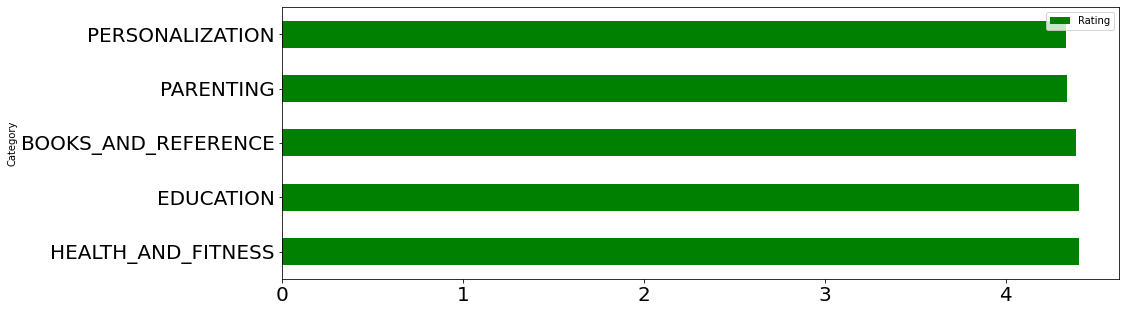

In [ ]:
Onelac_club_highrating.plot.barh(figsize=(15,5),color='green',fontsize=20)

### **Below App Category has Maximum Avg Rating with minimum 100000 Intallations**
###1) HEALTH_AND_FITNESS
###2) EDUCATION
###3) BOOKS_AND_REFERENCEGAME
###4) PARENTING
###5) PERSONALIZATION



## Among all the Database Which Apps has the highest Rating among all?

In [ ]:
df['Rating'].max()
Top_rated = df[df['Rating']==5.0]
Top_rated [['App','Rating']]

,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
...,...,...
10721,Mad Dash Fo' Cash,5.0
10742,GKPB FP Online Church,5.0
10776,Monster Ride Pro,5.0
10820,Fr. Daoud Lamei,5.0


In [ ]:
Top_rated['App'].nunique()

271

### **There is Total 271 Apps Having 5.0 Top Rating**

##**Content Rating vs App users**

In [ ]:
content_Rating_type = df['Content Rating'].value_counts()
content_Rating_type

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<Axes: ylabel='Content Rating'>

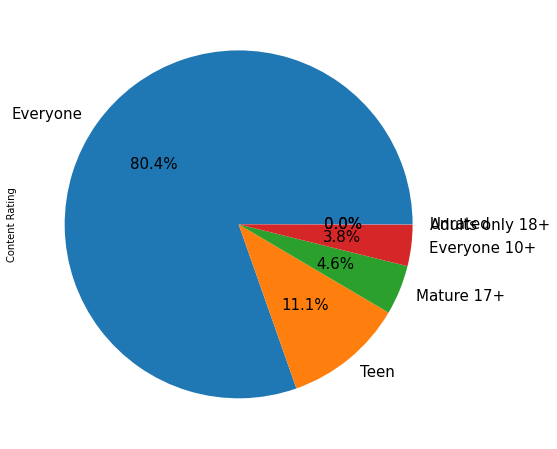

In [ ]:
content_Rating_type.plot.pie(figsize=(8,8),fontsize=15, autopct='%1.1f%%')

#as we can see some details are overlap so user can not analize properly

Text(0, 0.5, 'Frequency of rating type')

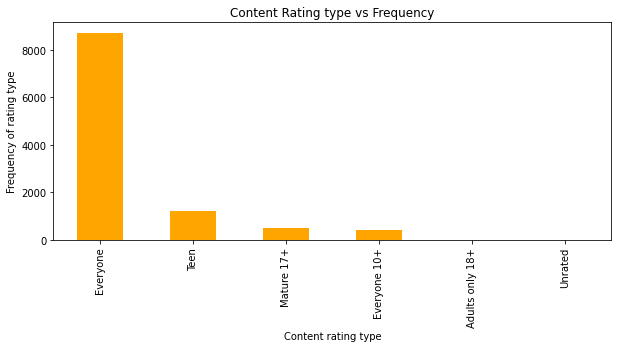

In [ ]:
content_Rating_type.plot.bar(figsize=(10,4),fontsize=10, color='orange')

plt.title('Content Rating type vs Frequency')
plt.xlabel('Content rating type')
plt.ylabel('Frequency of rating type')

### As per Above Analysis of Database Apps :
####--> 80.4% apps has no age restriction and It can be used by everone
####--> 11.1% apps has age restriction and used by teenagers category.
####--> 4.6 % apps can only use who are above 17+ age.
####--> 3.8% apps can only use who are above 10+ age.

#Which apps are the most popular apps or having maximum number of Reviews ?

In [ ]:
Most_Popular_apps = df.groupby(['App','Category']).agg({'Reviews':'max'}).sort_values('Reviews', ascending=False)

###Top 5 most popular apps with having maximum number of Reviews

In [ ]:
Top_Most_Popular_apps = Most_Popular_apps.head()
Top_Most_Popular_apps

,,Reviews
App,Category,
Facebook,SOCIAL,78158306
WhatsApp Messenger,COMMUNICATION,69119316
Instagram,SOCIAL,66577446
Messenger – Text and Video Chat for Free,COMMUNICATION,56646578
Clash of Clans,GAME,44893888


###**Facebook App has the Maximum number of  Reviews so we can say that Facebook is Most Popular App among all**

# **Most Popular App Category with Highest Avg numbers of user Reviews, Rating & Installations**

In [ ]:
df.groupby('Category').agg({'Reviews':'mean','Rating':'mean','Installs':'mean'}).sort_values('Reviews',ascending=False).head()

,Reviews,Rating,Installs
Category,,,
COMMUNICATION,2.107138e+06,4.180103,8.435989e+07
SOCIAL,2.105903e+06,4.261017,4.769447e+07
GAME,1.385859e+06,4.286888,3.066960e+07
PHOTOGRAPHY,6.373631e+05,4.197910,3.011417e+07
VIDEO_PLAYERS,6.307439e+05,4.084000,3.555430e+07


##**App Ratings & Reviews matter a lot when it comes to user acquisition. They play a massive role in a person's decision to download an App.**

###Here are the top 5 Categories that is having the most numbers of average Reviews, Ratings & Installations, So we can say that Users are more Engaged with these top 5 categories:

### **1) COMMUNICATION**
### **2) SOCIAL**
### **3) GAME**
### **4) PHOTOGRAPHY**
### **5) VIDEO_PLAYERS**

Text(0.5, 0, 'Apps')

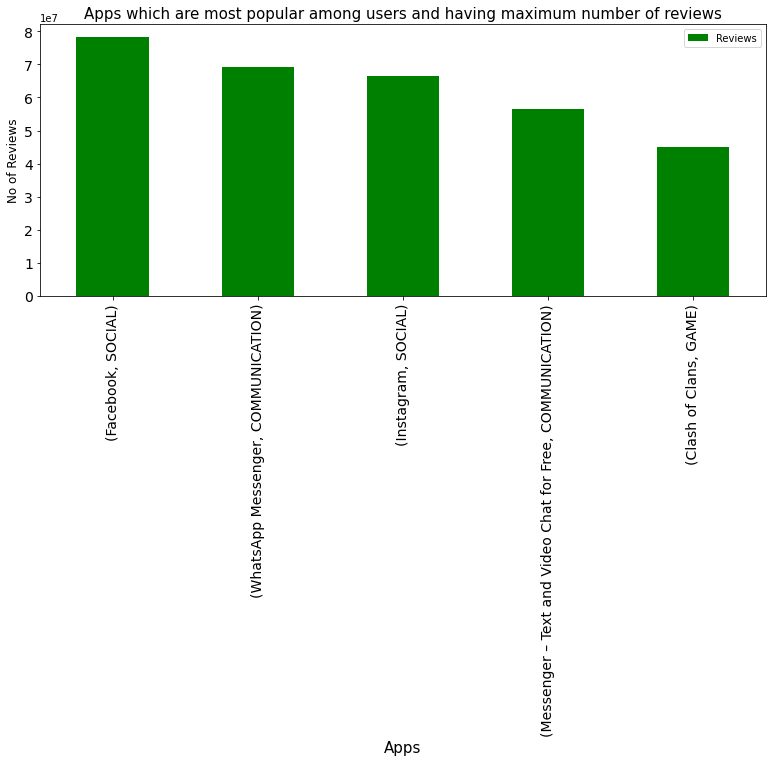

In [ ]:
#Plotting Bar Chart for Better Visulization
Top_Most_Popular_apps.plot(kind='bar',color=['g'],figsize = (13,5),fontsize = 14)

plt.title('Apps which are most popular among users and having maximum number of reviews',fontsize = 15)
plt.ylabel('No of Reviews',fontsize =12)
plt.xlabel('Apps',fontsize = 15)

#Business Oriented Insight

###Creating a new Column Revenue based on Installs and Price to derive Business insights

In [ ]:
df['Revenue'] = df['Installs']*df['Price']

##Which apps genrated the Maximum Revenue?

--> note: we here only considering the apps which has to pay before using it

In [ ]:
Maximum_revenue = df.groupby(['App']).agg({'Revenue':'max'},).sort_values('Revenue',ascending=False).head()
Maximum_revenue

,Revenue
App,
Minecraft,69900000.0
I am rich,39999000.0
I Am Rich Premium,19999500.0
Hitman Sniper,9900000.0
Grand Theft Auto: San Andreas,6990000.0


* Here We get Top 5 most revenue generated Apps.
###**MINECRAFT is the most revenue generated app among all**

Text(0, 0.5, 'Apps')

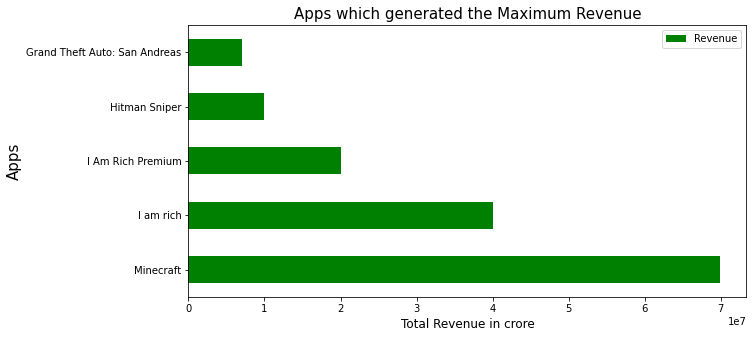

In [ ]:
Maximum_revenue.plot.barh(figsize=(10,5), color='Green')

plt.title('Apps which generated the Maximum Revenue',fontsize = 15)
plt.xlabel('Total Revenue in crore',fontsize =12)
plt.ylabel('Apps',fontsize = 15)

#Which App Category Generates most of the Revenue ?

In [ ]:
fivemost_Revenue_category = df.groupby('Category').agg({'Revenue':'sum'}).sort_values('Revenue',ascending=False).head()
fivemost_Revenue_category

,Revenue
Category,
FAMILY,1.860526e+08
LIFESTYLE,5.758394e+07
GAME,4.098764e+07
FINANCE,2.572668e+07
PHOTOGRAPHY,2.092277e+07


Text(0.5, 0, 'App Category')

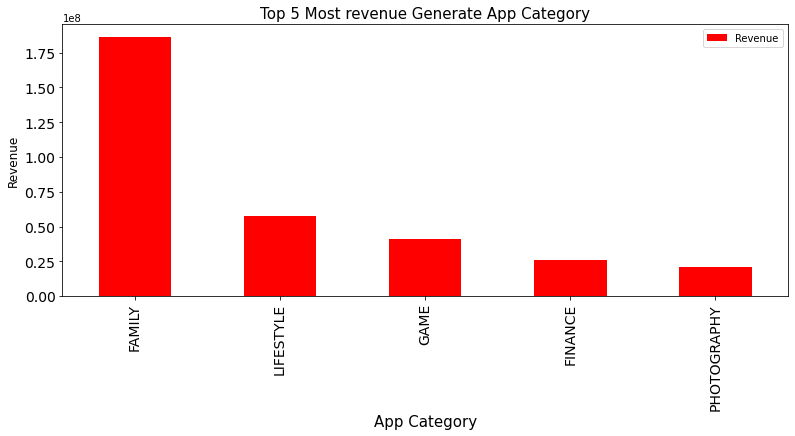

In [ ]:
fivemost_Revenue_category.plot(kind='bar',color=['r'],figsize = (13,5),fontsize = 14)

plt.title('Top 5 Most revenue Generate App Category',fontsize = 15)
plt.ylabel('Revenue',fontsize =12)
plt.xlabel('App Category',fontsize = 15)

##TOP 5 Highest Revenue generating App Category :
* Family
* Lifestyle
* Game
* Finance
* Photography

#Which app is the most expensive app among all?

In [ ]:
df['Price'].max()

400.0

In [ ]:
most_expensive_app = df[df['Price'] == 400.0 ][['App','Revenue','Category']]
most_expensive_app                                                             #<---- we are getting 2 index having same value so..

,App,Revenue,Category
4367,I'm Rich - Trump Edition,4000000.0,LIFESTYLE


###-->**I'm Rich - Trump Edition is the most expensive app among all**

#Which Apps has the most number of Users Installation?

###These are the apps which has the most number of user installation from Highest to lowest:-

In [ ]:
df.groupby('App').agg({'Installs':'max'}).sort_values('Installs',ascending=False).head()

,Installs
App,
Gmail,1000000000
Google Street View,1000000000
Subway Surfers,1000000000
Facebook,1000000000
Skype - free IM & video calls,1000000000


In [ ]:
df['Installs'].max()
Most_installed_apps = df[df['Installs']==1000000000] [['App','Installs']]

Most_installed_apps.groupby('App').agg({'Installs': 'max'})

,Installs
App,
Facebook,1000000000
Gmail,1000000000
Google,1000000000
Google Chrome: Fast & Secure,1000000000
Google Drive,1000000000
Google News,1000000000
Google Photos,1000000000
Google Play Books,1000000000
Google Play Games,1000000000


In [ ]:
Most_installed_apps['App'].nunique()

20

###There is total 20 Apps which have most number 1000000000 of Users

##Which application is mostly used by Teenagers?

In [ ]:
teen_apps = df[df['Content Rating'] == 'Teen']
teen_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_updated,Rating_Type,Revenue
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,Top Rated,0.0
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,10000000,Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up,2018-04-02,Top Rated,0.0
34,I Creative Idea,ART_AND_DESIGN,4.7,353,4.2M,10000,Free,0.0,Teen,Art & Design,"April 27, 2018",1.6,4.1 and up,2018-04-27,Top Rated,0.0
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,10000000,Free,0.0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,2018-07-11,Top Rated,0.0
112,Selfie Camera Photo Editor & Filter & Sticker,BEAUTY,4.1,187,30M,50000,Free,0.0,Teen,Beauty,"July 24, 2018",3.0.1,4.0.3 and up,2018-07-24,Top Rated,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,Poker Pro.Fr,GAME,4.2,5442,17M,100000,Free,0.0,Teen,Card,"May 22, 2018",4.1.3,2.3 and up,2018-05-22,Top Rated,0.0
10814,FR: My Secret Pets!,FAMILY,4.0,785,31M,50000,Free,0.0,Teen,Entertainment,"June 3, 2015",1.3.1,3.0 and up,2015-06-03,Top Rated,0.0
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,5000,Free,0.0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up,2017-08-05,Above Average,0.0
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,2018-06-27,Top Rated,0.0


In [ ]:
teen_apps.Installs.max()

1000000000

In [ ]:
teen_apps.drop_duplicates(subset='App', keep = 'first', inplace= True)          #<--- this will remove thed uplicate values from column 'App', so apps name wont repeated

<ipython-input-226-dcb3845cd299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teen_apps.drop_duplicates(subset='App', keep = 'first', inplace= True)          #<--- this will remove thed uplicate values from column 'App', so apps name wont repeated


In [ ]:
teen_apps[teen_apps['Installs']==1000000000] [['App','Installs']]

,App,Installs
152,Google Play Books,1000000000
865,Google Play Games,1000000000
2544,Facebook,1000000000
2545,Instagram,1000000000
2554,Google+,1000000000
3665,YouTube,1000000000
3687,Google Play Movies & TV,1000000000
3736,Google News,1000000000


###--- > There is Total 8 Apps Which is Popular among Teen Category as per higest Intsallations

##Which gaming App is mostly prefferd by the Teenagers?

In [ ]:
# First Getting the subset of dataframe have category Game & Content Rating Teen only to analyse better

Game_category = df[(df['Category']=='GAME') & (df['Content Rating']=='Teen')]

In [ ]:
# We will Consider Most popular app on basis of Maximum no of installtions in category

Popular_teen_game = Game_category[ Game_category['Installs'] == Game_category['Installs'].max() ] [['App','Category','Content Rating','Installs']]
Popular_teen_game

,App,Category,Content Rating,Installs
1718,Garena Free Fire,GAME,Teen,100000000
1758,Hungry Shark Evolution,GAME,Teen,100000000
1915,Garena Free Fire,GAME,Teen,100000000
1949,Garena Free Fire,GAME,Teen,100000000
1957,Bus Rush: Subway Edition,GAME,Teen,100000000
1988,Hungry Shark Evolution,GAME,Teen,100000000
3912,Asphalt 8: Airborne,GAME,Teen,100000000
3973,Hungry Shark Evolution,GAME,Teen,100000000
5417,Mobile Legends: Bang Bang,GAME,Teen,100000000
10327,Garena Free Fire,GAME,Teen,100000000


In [ ]:
# we saw as above dataframe has duplicate app value so go get exact app name we can apply unique val
print(Popular_teen_game['App'].unique())

['Garena Free Fire' 'Hungry Shark Evolution' 'Bus Rush: Subway Edition'
 'Asphalt 8: Airborne' 'Mobile Legends: Bang Bang']


###There is Total 5 Games App which is Popular Among Teen
* Garena Free Fire
* Hungry Shark Evolution
* Bus Rush: Subway Edition
* Asphalt 8: Airborne
* Mobile Legends: Bang Bang

Having Most numbers of Installtions

In [ ]:
TeenGame = Game_category.groupby('App').agg({'Installs':'max'}).sort_values(['Installs'],ascending=False).head()

# by this code we will get all the Popular Gaming apps in teen Category base on most numbers of installation from highest to lowest

#In Gaming Category Which genere has the most no of users or Installation?

In [ ]:
#First Get subset of DF having only category Game

Genre_game = df[df['Category']=='GAME']

In [ ]:
Most_Prefferd_Genres = Genre_game.groupby('Genres').agg({'Installs':'sum'}).sort_values('Installs', ascending = False)
Most_Prefferd_Genres

# this will give us all the generes in Game category sort by highest to lowest numbers of installations Value

,Installs
Genres,
Arcade,10727129155
Action,9342039190
Casual,6949000000
Racing,2000247320
Puzzle,1189200000
Strategy,1157300000
Sports,1116000000
Adventure;Action & Adventure,500000000
Adventure,406695320


#These are the top 5 genre in the gaming Category which has the most number of user Installation

In [ ]:
top5_Game_genre = Most_Prefferd_Genres.head()
top5_Game_genre

,Installs
Genres,
Arcade,10727129155
Action,9342039190
Casual,6949000000
Racing,2000247320
Puzzle,1189200000


Text(0.5, 0, 'Apps')

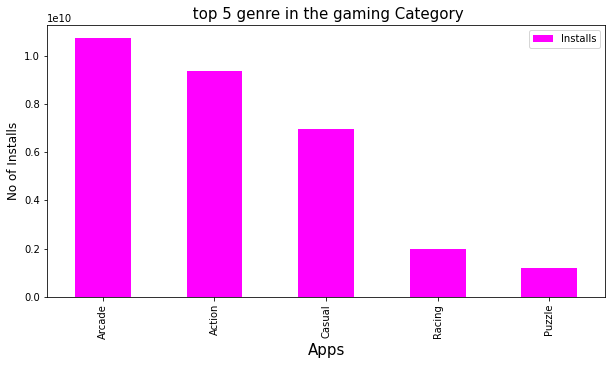

In [ ]:
top5_Game_genre.plot.bar(figsize=(10,5),color='magenta', fontsize=10)

plt.title(' top 5 genre in the gaming Category',fontsize = 15)
plt.ylabel('No of Installs',fontsize =12)
plt.xlabel('Apps',fontsize = 15)

##---> Here we analyze that **'Arcane Genre'** Gaming Category Apps is Most Popular & having Highest numbers of Installations

#**Analyze dataset users_review**

### Importing the another dataset users_review


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Data analysis notes/Capston project 1 /User Reviews.csv')

####Rows and Column count in the dataset


In [ ]:
df1.shape

(64295, 5)

In [ ]:
#To analize database first
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


###Checking the null values in the Dataset

In [ ]:
df1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

###Removing the null values from the dataset.

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
df1.shape

(37427, 5)

##**Sentiment Analysis**

In [ ]:
sentiment_value = df1['Sentiment'].value_counts()
sentiment_value

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'App vs Sentiment Rating')

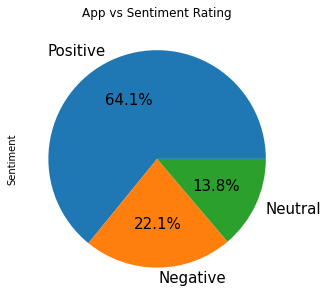

In [ ]:
sentiment_value.plot.pie(figsize=(10,5),fontsize=15,autopct="%1.1f%%")

plt.title('App vs Sentiment Rating')


####--> 64.1% of the Apps which has Positive Sentiment.
####--> 22.1% of the Apps which has Negative Sentiment.
####--> 13.8% of the Apps which has Neutral Sentiment.

Text(0.5, 0, 'Apps')

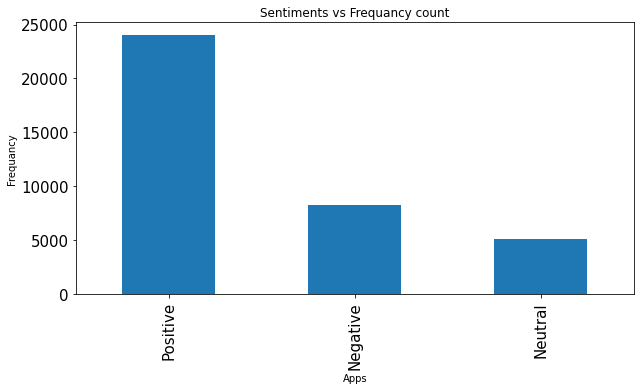

In [ ]:
sentiment_value.plot.bar(figsize=(10,5), fontsize=15)

plt.title('Sentiments vs Frequancy count')
plt.ylabel('Frequancy')
plt.xlabel('Apps')

##Which apps has the most number of Positive Sentiment?

In [ ]:
# get a subset from database having only positive sentiment type

positive_sentiment_apps = df1[df1['Sentiment']=='Positive']

##These are the top 5 apps which has the most number of Positive Sentiment as per database

In [ ]:
positive_sentiment_apps.groupby('App').agg({ 'Sentiment':'count'}).sort_values('Sentiment',ascending=False).head()

,Sentiment
App,
Helix Jump,209
Duolingo: Learn Languages Free,200
Calorie Counter - Macros,174
Calorie Counter - MyFitnessPal,169
Bowmasters,169


##Which apps has the most number of Negative Sentiment?

In [ ]:
# get a subset from database having only positive sentiment type

Negative_sentiment_apps = df1[df1['Sentiment']=='Negative']

##These are the top 5 apps which has the most number of Negative Sentiment.

In [ ]:
Negative_sentiment_apps.groupby(['App']).agg({'Sentiment':'count'}).sort_values('Sentiment',ascending=False).head()

,Sentiment
App,
Angry Birds Classic,147
Candy Crush Saga,126
Bowmasters,119
8 Ball Pool,106
Candy Crush Soda Saga,96


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_updated,Rating_Type,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,Top Rated,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,Above Average,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,Top Rated,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,Top Rated,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,Top Rated,0.0


## **Corelation Heatmap**

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price,Revenue
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000,1.084000e+04
mean,4.206476,4.441529e+05,1.546434e+07,1.027368,3.585142e+04
std,0.480342,2.927761e+06,8.502936e+07,15.949703,1.065980e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.800000e+01,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,1.000000e+09,400.000000,6.990000e+07


In [ ]:
#Creating a new dataset data_df to find the co-relation between different Columns

data_df = df[['Rating', 'Reviews', 'Installs', 'Price', 'Revenue']]

In [ ]:
corr_df = data_df.corr()
corr_df

,Rating,Reviews,Installs,Price,Revenue
Rating,1.000000,0.063166,0.045496,-0.019318,0.009065
Reviews,0.063166,1.000000,0.643122,-0.009667,0.005094
Installs,0.045496,0.643122,1.000000,-0.011689,-0.004503
Price,-0.019318,-0.009667,-0.011689,1.000000,0.194457
Revenue,0.009065,0.005094,-0.004503,0.194457,1.000000


##Plotting a heatmap using library Seaborn

<Axes: >

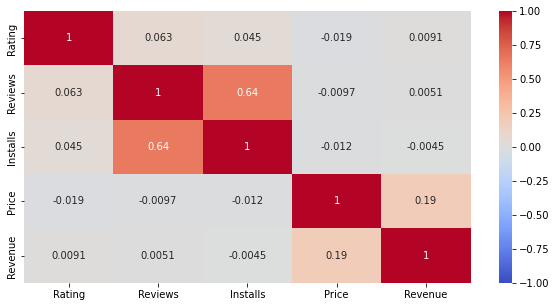

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True)

###**There is a Positive Co-relation between Reviews and Installs which means the apps has more number of Reviews or apps which are most popular has higher user installation.**

#**Conclusion**

##**I started from scratch where the dataset we took was completely raw. For Better Analysis, the First step was Data cleaning & make it in representable form, Missing values were also handled in this process.**

##**My motive for the whole project was to analyze the data and find out the main components that affect users' decisions to download an app. After Performing the Analysis on the Dataset. I have found that :-**


## 1. Free Apps have more user Installation as compared to paid apps. Also, most of the Apps available on PlayStore are Free.  It also means that Users prefer Free Apps more as compared to Paid Apps.

## 2. Percentage of Free apps are **~92%** and paid apps are **~8%**

## 3. Most competitive App Category : **Family**, with the most numbers of Apps in single category

## 4. App Category with the highest number of Installs: **Game**

## 5. There are 20 Apps in PlayStore that are Free & having highest Installations with over 1 billion users

## 6. Popularity on basis of Maximum number of Reviews, **Facebook App** has the most Reviewed, Also we can say that Facebook is Most Popular App among all

## 7. App Ratings & Reviews matter a lot when it comes to user acquisition. They play a massive role in a person's decision to download an App. It also shows the users engagement towards specific App or App category

### Here is Top 5 Categories with the most numbers of avg Reviews, Ratings & Installations
####1) **COMMUNICATION**
####2) **SOCIAL**
####3) **GAME**
####4) **PHOTOGRAPHY**
####5) **VIDEO_PLAYERS**

## 8.  **Minecraft** app is the most revenue-generated app among all the apps in the Paid category with more than 10M installation..

## 9. Top 5 Paid App Category Which Generates Most Revenue are i) Family ii) lifestyle iii) Game iv) Finance v) Photography
## we can say that user are willing to pay for this paid categories app more

## 10. **I'm Rich - Trump Edition** is the most expensive App among all Paid Apps, which is belong from Family Category App.

## 11. There are a total of 271 Apps Having 5.0 Top Rating among all the apps, **HEALTH_AND_FITNESS App category** has a Maximum Avg Rating of 4.4 & with the minimum 100000 user Installations among all the other App categories

## 12.Percentage of apps with no age restrictions = **~81%**

## 13. There is Total 8 Apps Which is Popular among Teen Category as per higest Intsallations: **Google PlayBooks, Google PlayGames, Youtube, Facebook, Instagram, Google+, Google Play Movies & TV, Google News**. Having over 1 Billion Intallation.

## 14. In Gaming App Category, Most preferred Games among Teenagers are **'Garena Free Fire, 'Hungry Shark Evolution, 'Bus Rush: Subway Edition',' Asphalt 8: Airborne',' and 'Mobile Legends: Bang Bang'** with over 100 million user  installation

## 15. In the Gaming Category  **Arcade** genre gaming apps have the highest number of users Installation, Action Genere just comes next after it, We can analyze that People like to play Arcade genre games more compared to others.

## 16. App which contains the maximum number of Positive Reviews : **Helix Jump**

## 17. App which contains the maximum number of Negative Reviews : **Angry Bird Classic**

# As Per Provided Dataset we can analyze that

## --> 64.1% of the Apps which has Positive Sentiment.
## --> 22.1% of the Apps which has Negative Sentiment.
## --> 13.8% of the Apps which has Neutral Sentiment.


## --> 80.4% apps which has no age restriction and It can be used by everone.
## --> 11.1% apps which has age restriction and used by teenagers.
## --> 4.6 % apps which can only use who are above 17.
## --> 3.8% apps which can only use who are above 10.